# <b>Midterm Project</b>
### Environmental Data Collection in Makati City: Monitoring Temperature and Humidity with ESP32 and DHT11 Sensor
$\text{Christian Kirsch Castillo, Ryan Patrick Maullon, Ronan Joshua Nano, Dennis Serraon | Digital Signal Processing - 58035 }$

In [2]:
#Run all the code consecutively
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <b>Loading of raw data (.csv format) and some insights</b>

In [63]:
#Loading the dsp.csv file which is the raw data that needs to be clean
data = pd.read_csv('dsp.csv')

#Determine the number of data collected
data.shape

(17370, 3)

In [62]:
## Cleaning the dsp.csv to 15 minutes interval
# Converting 'Date and time' column to a datetime format
data['Date and time'] = pd.to_datetime(data['Date and time'], format='%m/%d/%Y %H:%M:%S')

# Set the 'Date and time' column as the index
data.set_index('Date and time', inplace=True)

# Resample the data with a 15-minute interval
data_resampled = data.resample('15T').first()

# Reset the index to have the filtered time intervals as a regular column
data_resampled = data_resampled.reset_index()

#Save as cleaned.csv
#data_resampled.to_csv('cleaned.csv', index=False)


In [65]:
# Loading the cleaned.csv file from the code above
data = pd.read_csv('cleaned.csv')

# Convert the 'Date and Time' column to a datetime format
data['Date and time'] = pd.to_datetime(data['Date and time'], format='%Y-%m-%d %H:%M:%S')

# Delete rows with empty cells/no values in 'Temperature' and 'Humidity' columns
data.dropna(subset=['Temperature', 'Humidity'], how='all', inplace=True)

# Reset the index to have the filtered time intervals as a regular column
final_data = data.reset_index()

#Save as final.csv (the csv file that we are going to use throughout the project)
data.to_csv('final.csv', index=False)

In [69]:
data = pd.read_csv('final.csv')

#overview of the data
data.head(10)

,Date and time,Temperature,Humidity
0,2023-10-20 00:00:00,31.6,76.2
1,2023-10-20 00:15:00,31.5,77.9
2,2023-10-20 00:30:00,31.7,79.1
3,2023-10-20 00:45:00,31.3,78.5
4,2023-10-20 01:00:00,31.2,84.9
5,2023-10-20 01:15:00,30.6,80.3
6,2023-10-20 01:30:00,30.6,80.0
7,2023-10-20 01:45:00,30.6,80.2
8,2023-10-20 02:00:00,30.5,80.2
9,2023-10-20 10:30:00,29.8,69.7


In [70]:
#Final data shape (number of data gathered)
data.shape

(1155, 3)

In [77]:
#DataFrame
data.describe()

,Temperature,Humidity
count,1155.000000,1155.000000
mean,31.617229,71.074113
std,1.318948,7.937258
min,25.700000,43.500000
25%,30.700000,66.800000
50%,31.700000,72.000000
75%,32.500000,76.900000
max,35.200000,96.500000


### <b>Plots and other visualization</b>

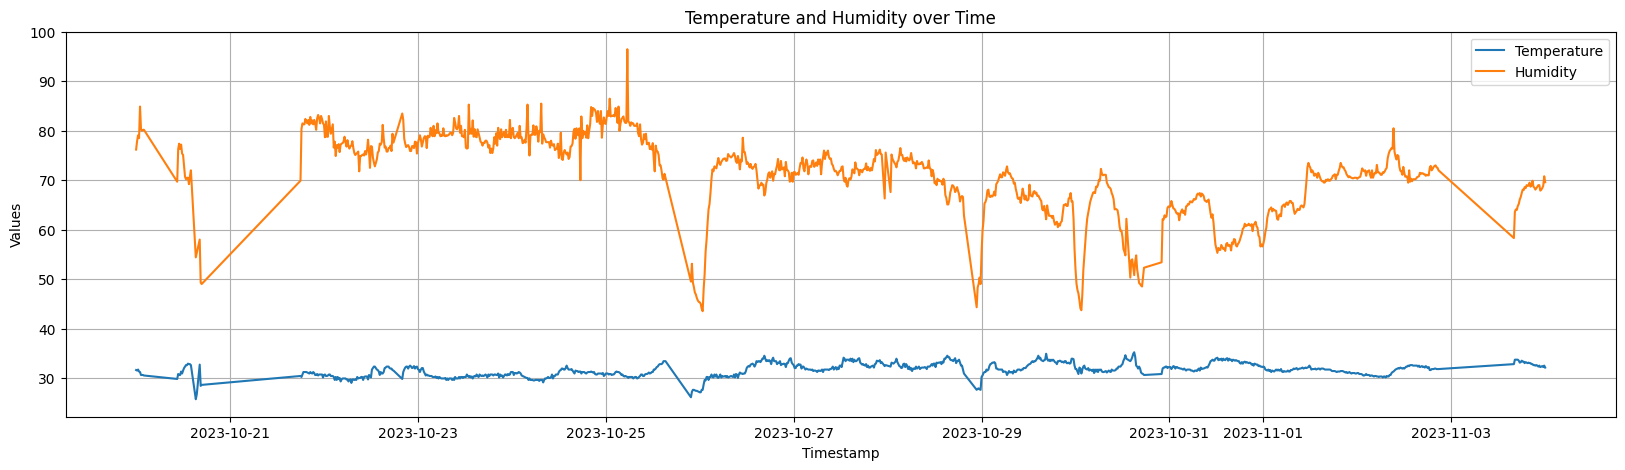

In [335]:
# Load the csv data
data = pd.read_csv('final.csv')

# Convert 'Date and time' column to datetime
data['Date and time'] = pd.to_datetime(data['Date and time'])

#set 'Date and time' column as index
data.set_index('Date and time', inplace=True)

# Create a line graph for temperature over time
plt.figure(figsize=(20, 5))
plt.plot(data['Temperature'], label='Temperature')
plt.plot(data['Humidity'], label='Humidity')
plt.title('Temperature and Humidity over Time')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid()
plt.legend()
plt.show()

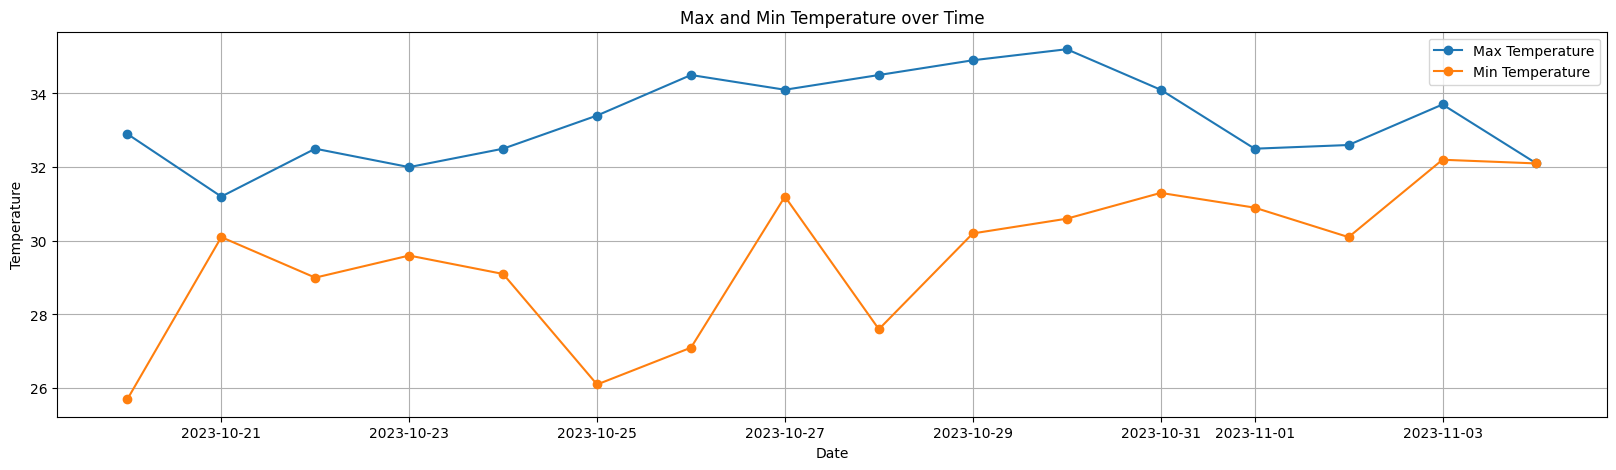

In [19]:
## FOR CALCULATING T MAX AND T MIN PER 'D' DAY
# Load the csv data
data = pd.read_csv('final.csv')

# Convert 'Date and time' column to datetime
data['Date and time'] = pd.to_datetime(data['Date and time'])

# Set 'Date and time' column as the index
data.set_index('Date and time', inplace=True)

# Resample the data to daily frequency and calculate max and min temperatures
daily_max = data['Temperature'].resample('D').max()
daily_min = data['Temperature'].resample('D').min()

# PLOTTING
plt.figure(figsize=(20, 5))
plt.plot(daily_max, label='Max Temperature', linestyle='-', marker='o')
plt.plot(daily_min, label='Min Temperature', linestyle='-', marker='o')
plt.title('Max and Min Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid()
plt.legend()
plt.show()


In [11]:
# Load the csv data while excluding the 'Date and time' column
df = pd.read_csv('final.csv', usecols=['Temperature', 'Humidity'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation coefficient between temperature and humidity
print(correlation_matrix.loc['Temperature', 'Humidity'])

-0.2688010607470585


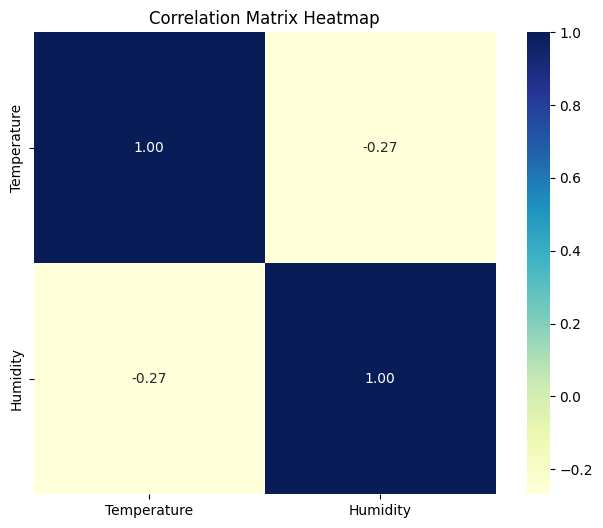

In [15]:
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### <b>Temperature Analysis per day (2 Weeks)</b>

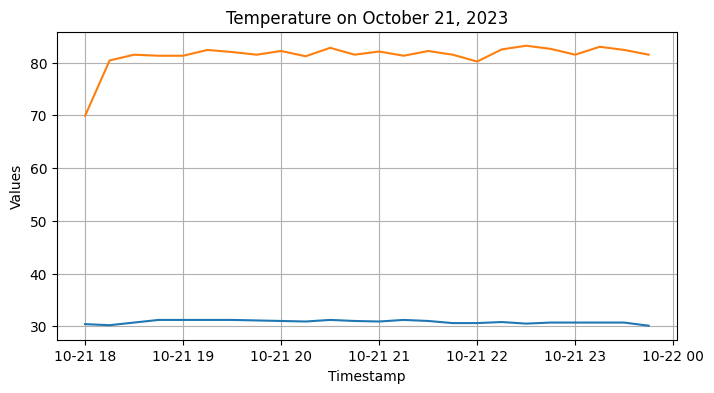

In [208]:
data = pd.read_csv('final.csv')
data['Date and time'] = pd.to_datetime(data['Date and time'])

#Filter the data to specific date
october_21_data = data[data['Date and time'].dt.date == pd.to_datetime('2023-10-21').date()]

#Set the 'Date and time' as index for x axis
october_21_data.set_index('Date and time', inplace=True)

#October 21 Graph (Sample code, only for graphing specific date)
plt.figure(figsize=(8, 4))
plt.plot(october_21_data['Temperature'])
plt.plot(october_21_data['Humidity'])
plt.title('Temperature on October 21, 2023')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.grid()
plt.show()

##### First Week

In [3]:
### OCTOBER 2O TO OCTOBER 26
data = pd.read_csv('final.csv')
data['Date and time'] = pd.to_datetime(data['Date and time'])

# Set the 'Date and time' column as the index
data.set_index('Date and time', inplace=True)

# list to store the filtered DataFrames
filtered_data = []

# Define the start and end day
start_day = 20 
end_day = 26 

# Iterate through the days and filter the data from October 20 to October 26
for day in range(start_day, end_day + 1):
    # Format the date string as '2023-10-xx'
    date_string = f'2023-10-{day:02}'  # Using f-string to format day as zero-padded
    # Filter the data for the current date
    current_date = pd.to_datetime(date_string).date()
    filtered_df = (data[data.index.date == current_date])
    print('\n',date_string)
    print(filtered_df.describe())




 2023-10-20
       Temperature   Humidity
count    29.000000  29.000000
mean     30.958621  71.634483
std       1.757741   9.529926
min      25.700000  49.000000
25%      30.600000  70.200000
50%      31.300000  75.100000
75%      32.300000  77.900000
max      32.900000  84.900000

 2023-10-21
       Temperature   Humidity
count    24.000000  24.000000
mean     30.825000  81.333333
std       0.323365   2.547406
min      30.100000  69.900000
25%      30.675000  81.300000
50%      30.850000  81.500000
75%      31.125000  82.400000
max      31.200000  83.200000

 2023-10-22
       Temperature   Humidity
count    88.000000  88.000000
mean     30.813636  77.009091
std       1.022413   2.160813
min      29.000000  71.800000
25%      29.900000  75.800000
50%      30.450000  76.850000
75%      31.900000  77.800000
max      32.500000  83.500000

 2023-10-23
       Temperature   Humidity
count    96.000000  96.000000
mean     30.404167  79.022917
std       0.485997   1.609543
min      29.600000

##### Second Week

In [4]:
### OCTOBER 27 TO OCTOBER 31
data = pd.read_csv('final.csv')
data['Date and time'] = pd.to_datetime(data['Date and time'])

# Set the 'Date and time' column as the index
data.set_index('Date and time', inplace=True)

# list to store the filtered DataFrames
filtered_data = []

# Define the start and end day
start_day = 27 
end_day = 31 

# Iterate through the days and filter the data from October 27 to October 31
for day in range(start_day, end_day + 1):
    # Format the date string as '2023-10-xx'
    date_string = f'2023-10-{day:02}'  # Using f-string to format day as zero-padded
    # Filter the data for the current date
    current_date = pd.to_datetime(date_string).date()
    filtered_df = (data[data.index.date == current_date])
    print('\n',date_string)
    print(filtered_df.describe())




 2023-10-27
       Temperature   Humidity
count    93.000000  93.000000
mean     32.456989  72.705376
std       0.788973   1.774479
min      31.200000  66.300000
25%      31.700000  71.700000
50%      32.300000  72.500000
75%      33.100000  73.900000
max      34.100000  76.200000

 2023-10-28
       Temperature   Humidity
count    81.000000  81.000000
mean     32.423457  69.786420
std       1.418738   6.378043
min      27.600000  44.300000
25%      32.100000  68.000000
50%      32.500000  72.300000
75%      33.100000  73.700000
max      34.500000  76.500000

 2023-10-29
       Temperature   Humidity
count    96.000000  96.000000
mean     32.557292  66.136458
std       1.055885   3.419206
min      30.200000  55.300000
25%      31.700000  64.050000
50%      32.900000  66.450000
75%      33.400000  67.950000
max      34.900000  72.800000

 2023-10-30
       Temperature   Humidity
count    76.000000  76.000000
mean     32.007895  60.031579
std       0.982617   8.152189
min      30.600000

In [8]:
### NOVEMBER 1 TO NOVEMBER 3
data = pd.read_csv('final.csv')
data['Date and time'] = pd.to_datetime(data['Date and time'])

# Set the 'Date and time' column as the index
data.set_index('Date and time', inplace=True)

# list to store the filtered DataFrames
filtered_data = []

# Define the start and end day
start_day = 1 
end_day = 3

# Iterate through the days and filter the data from November 1 to November 3
for day in range(start_day, end_day + 1):
    # Format the date string as '2023-11-xx'
    date_string = f'2023-11-{day:02}'  # Using f-string to format day as zero-padded
    # Filter the data for the current date
    current_date = pd.to_datetime(date_string).date()
    filtered_df = (data[data.index.date == current_date])
    print('\n',date_string)
    print(filtered_df.describe())


 2023-11-01
       Temperature   Humidity
count    96.000000  96.000000
mean     31.580208  67.733333
std       0.347508   3.939855
min      30.900000  57.200000
25%      31.300000  64.200000
50%      31.600000  69.800000
75%      31.800000  70.925000
max      32.500000  73.500000

 2023-11-02
       Temperature   Humidity
count    84.000000  84.000000
mean     31.403571  72.041667
std       0.847171   1.845098
min      30.100000  69.500000
25%      30.500000  70.900000
50%      31.750000  71.550000
75%      32.200000  72.500000
max      32.600000  80.500000

 2023-11-03
       Temperature   Humidity
count    32.000000  32.000000
mean     32.928125  67.550000
std       0.468515   2.442368
min      32.200000  58.300000
25%      32.500000  67.200000
50%      33.000000  68.400000
75%      33.225000  68.900000
max      33.700000  70.800000
